In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("onlinefraud.csv",low_memory=False)

In [39]:
df.head()

,step,Type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [40]:
df.dtypes

,0
step,int64
Type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [41]:
df.shape


(1048575, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   Type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 88.0+ MB


In [43]:
df.isnull().sum()

,0
step,0
Type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [44]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
df.drop(labels=['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [45]:
df.head()

,step,Type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [46]:
df[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

,0
amount,10000000.00
oldbalanceOrg,38939424.03
newbalanceOrg,38946233.02
oldbalanceDest,42054659.73
newbalanceDest,42169156.09


In [47]:
df.loc[df.isFraud==1].Type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [48]:
df.Type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [49]:
df1= df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                            'CASH_IN':4,'DEBIT':5})

<ipython-input-49-a354c4e96586>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1= df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,


In [50]:
df1.head()

,step,Type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [55]:
X=df1.drop('isFraud',axis=1)
y=df1['isFraud']

In [57]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


**Machine Learning Model**

In [62]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=111)


In [68]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(734002, 7)
(314573, 7)
(734002,)
(314573,)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(train_X)
X_test=scaler.transform(test_X)

In [105]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()

In [106]:
linreg_model.fit(train_X,train_Y)

LinearRegression()

In [95]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(solver='liblinear', random_state=22,max_iter=200)


In [96]:
logreg_model.fit(train_X,train_Y)

LogisticRegression(max_iter=200, random_state=22, solver='liblinear')

In [87]:
from sklearn.ensemble import RandomForestClassifier
randomfor_model = RandomForestClassifier(n_estimators=15)

In [89]:
randomfor_model.fit(train_X,train_Y)

RandomForestClassifier(n_estimators=15)

In [107]:
y_pred_lin=linreg_model.predict(test_X)

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix    #linear regression not suited for classification tasks mostly suited for regression tasks just used here to compare with other models
y_pred_lin = (y_pred_lin > 0.5).astype(int)  # Assuming a binary classification task
accuracy_score(test_Y, y_pred_lin)

0.9990208949909878

In [120]:
y_pred_log = logreg_model.predict(test_X)

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_Y,y_pred_log)

0.9991162623619955

In [92]:
y_pred_rf=randomfor_model.predict(test_X)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_Y,y_pred_rf)

0.9998029074332508

In [119]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation for each model
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5)
rf_cv_scores = cross_val_score(randomfor_model, X, y, cv=5)
print("Logistic Regression Average CV Score:", logreg_cv_scores.mean())
print("Random Forest Average CV Score:", rf_cv_scores.mean())
#Since high cv and high accuracy of logistic regression implies overfitting and less genaralization to unseen data compared to Random forest hence random forest best fits here

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression Average CV Score: 0.9992876046062513
Random Forest Average CV Score: 0.8197487065779748


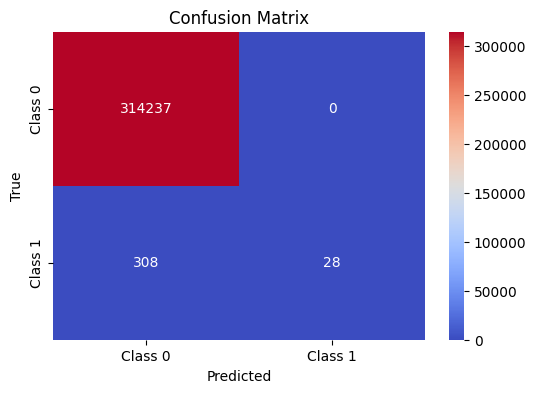

In [116]:
conf_matrix = confusion_matrix(test_Y, y_pred_lin)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

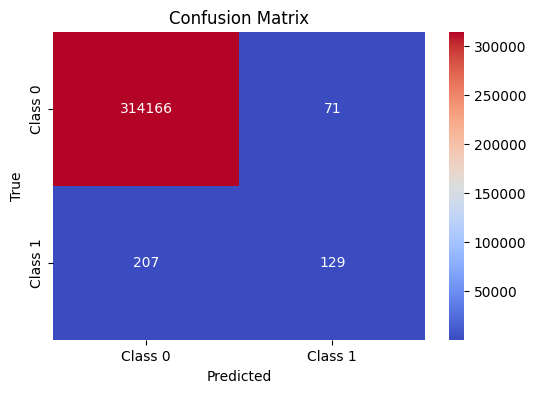

In [122]:
conf_matrix = confusion_matrix(test_Y, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

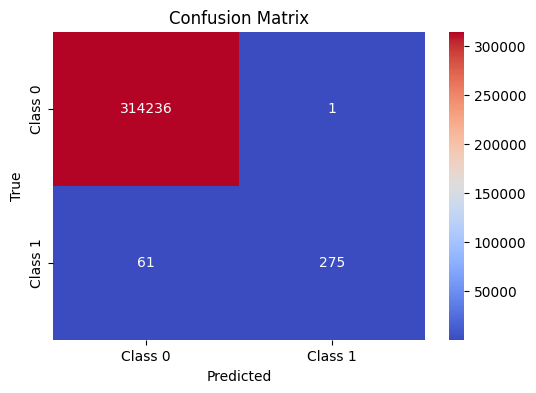

In [100]:
conf_matrix = confusion_matrix(test_Y, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()